In this notebook, I will implement a univariate gradient descent model using randomly generated data 
(Credits for the data : Kaggle https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch/notebook).

The implementation of the model is quite trivial however it took me a long time to complete it. I ran across errors because of my incomplete knowledge of Python - as of now, when I am implementing this model, I have just began to use Python modules. Thus I did not completely understand DataFrames and Arrays and Lists quite clearly. I was using the function pd.DataFrame to scrape the data from df instead of the np.array function. This resulted in x_train and y_train to become DataFrames instead of arrays. I was continually coming across an error with the title "Output exceeds the size limit. Open the full output data in a text editor". The error that I was making was unclear to me for quite some time because of this title. After adding checks to the code, I realised that my code is breaking the moment it encountered the line x[i]. It took me some time after this to realise that I am not able to access x[i] since x is NOT an array, rather a data frame.

Post making this correction, I encountered yet another hurdle - my parameters were being returned as [nan] instead of some values. I tried reducing the size of the training data (m) and it seems to work fine then. It turns out that the data was corrupted- x[213] was 35.32 or something close to that however y[213] was empty - while trying to print this, it printed Nan. I reported the error on Kaggle.

A lesson that I learned was to check the correctness of the data before using it to train your model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./Univariate_Linear_Regression_TrainData.csv')
print(df)

      x          y
0    24  21.549452
1    50  47.464463
2    15  17.218656
3    38  36.586398
4    87  87.288984
..   ..        ...
695  58  58.595006
696  93  94.625094
697  82  88.603770
698  66  63.648685
699  97  94.975266

[700 rows x 2 columns]


In [338]:
x_train = np.array(df['x'])
print(x_train)

[ 24  50  15  38  87  36  12  81  25   5  16  16  24  39  54  60  26  73
  29  31  68  87  58  54  84  58  49  20  90  48   4  25  42   0  60  93
  39   7  21  68  84   0  58  19  36  19  59  51  19  33  85  44   5  59
  14   9  75  69  10  17  58  74  21  51  19  50  24   0  12  75  21  64
   5  58  32  41   7   4   5  49  90   3  11  32  83  25  83  26  76  95
  53  77  42  25  54  55   0  73  35  86  90  13  46  46  32   8  71  28
  24  56  49  79  90  89  41  27  58  26  31  70  71  39   7  48  56  45
  41   3  37  24  68  47  27  68  74  95  79  21  95  54  56  80  26  25
   8  95  94  54   7  99  36  48  65  42  93  86  26  51 100  94   6  24
  75   7  53  73  16  80  77  89  80  55  19  56  47  56   2  82  57  44
  26  52  41  44   3  31  97  21  17   7  61  10  52  10  65  71   4  24
  26  51  42  62  74  77   3  50  24  37  58  52  27  14 100  35  72   5
  71  54  84  42  54  74  54  53  78  97  49  71  48  51  89  99  93  49
  18  65  83 100  41  52  29  97   7  51  58  50  6

In [1]:
y_train = np.array(df['y'])
print(y_train)

NameError: name 'np' is not defined

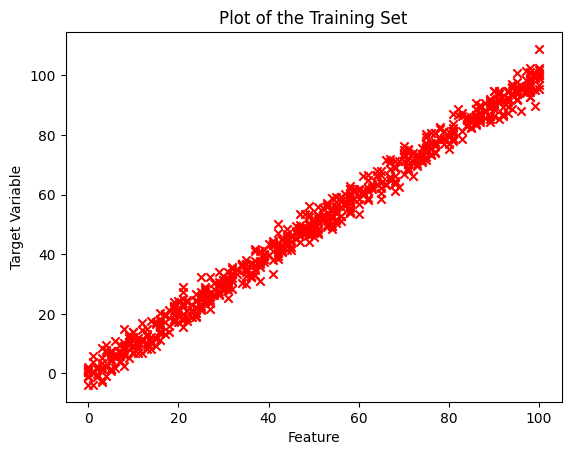

In [341]:
plt.scatter(x_train, y_train, c='r', marker='x')
plt.title("Plot of the Training Set")
plt.xlabel("Feature")
plt.ylabel("Target Variable")
plt.show()

In [344]:
def ComputeCost(x, y, w, b):
    '''
    This function computes the cost function for given parameters w and b
    
    Args:
    x (ndarray(m,)) : Features with m examples
    y (ndarray(m,)) : Target variable
    w, b (scalars) : parameters of linear regression model
    
    Returns:
    J_wb : the cost for given parameters
    '''
    J=0

    m = x.shape[0]
    for i in range(m):
        f_wb = w * x[i] + b
        J += (f_wb - y[i])**2
    J = J/(2 * m)
    
    return J

In [343]:
def ComputeGradient(x, y, w, b):
    ''' 
    This function computes the gradient i.e. dJ_dw and dJ_db for given values of w and b and returns its value
    
    Args:
    x (ndarray(m,)) : Features with m examples for the training se
    y (ndarray(m,)) : Values of target variable corresponding to the feature
    w, b (scalars) : parameters of linear regression model

    Returns:
    dJ_db, dJ_dw (floating point numbers) : the values of the partial derivatives of the cost function wrt parameters b and w resp.
    '''

    m = x.shape[0]
    dJ_db = 0
    dJ_dw = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dJ_db += f_wb - y[i]
        dJ_dw += (f_wb - y[i]) * x[i]
        
        #the below check has been added to check where we encounter Nan exactly
        if(dJ_dw != dJ_dw): 
            print("We encounter nan for i = ", i)
            break
    dJ_db = dJ_db/m         #this is the final value of the partial derivative of the cost function J wrt b (the 'bias')
    dJ_dw = dJ_dw/m         #this is the final value of the partial derivative of the cost function J wrt w (the 'weight')
    return dJ_dw, dJ_db

In [345]:
def GradientDescent(x, y, w_in, b_in, NUM_ITER = 1000, LEARN_RATE = 1.0e-3):
    '''
    I shall use batch gradient descent. 
    The number of times I update my parameters is controlled using the optional parameter NUM_ITER which defaults to 1000 if not passed
    The learning rate alpha is governed by the optional parameter LEARN_RATE which defaults to 0.001 if not passed
    
    Args:
    x (ndarray (m,0)) : Storing the feature variable of the training data
    y (ndarray (m,0)) : Storing the target variable of the training data
    w, b (scalars) : initally assigned parameters of linear regression model
    NUM_ITER, LEARN_RATE (scalars) : parameters of gradient descent
    
    Returns:
    w, b : final parameters that store the optimal value that can be used to predict new target values
    '''
    w = w_in
    b = b_in
    m = x.shape[0]

    for i in range(NUM_ITER):
        dJ_dw, dJ_db = ComputeGradient(x, y, w, b)
        w = w - LEARN_RATE * dJ_dw
        b = b - LEARN_RATE * dJ_db
    
    return w, b

In [349]:
def UnivariateLinearRegressionModel(feature, target):

    '''
    In this code block, we will make the use of the above functions to get our parameters w and b for the given data and use those to make predictions
    for input from test data
    
    Args:
    feature, target (ndarray(m,)) : Contain the training set with m examples
    
    Returns:
    w_final, b_final (scalars) : The optimal parameters of our linear regression model
    '''
    
    #initalizing the parameters required for a linear regression model
    w_init = 0.0
    b_init = 0.0

    #variables to be used in gradient descent
    NUM_ITER = 10000
    LEARN_RATE = 1.0e-5

    w_final, b_final = GradientDescent(feature, target, w_init, b_init, NUM_ITER, LEARN_RATE)
    print("gradient descent done")
    return w_final, b_final

In [351]:
def PredictOutput(test_data, weight, bias):
    '''
    We will predict the value of the target given input data

    Args:
    test_data (ndarray(n,)) : Contains test values of input feature with n number of examples
    weight, bias (scalars) : optimal parameters obtained from our linear regression model after using gradient descent

    Returns:
    predictions (ndarray(n,)) : Contains the predicted output that we found using our model
    '''
    
    n = test_data.shape[0]
    predictions = []

    for i in range(n):
        y_i = weight * test_data[i] + bias
        predictions.append(y_i)
    
    return predictions

In [352]:
df2 = pd.read_csv('./Univariate_Linear_Regression_TestData.csv')
print(df2)

      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


In [353]:
x_test = np.array(df2['x'])
print(x_test)

[ 77  21  22  20  36  15  62  95  20   5   4  19  96  62  36  15  65  14
  87  69  89  51  89  27  97  58  79  21  93  27  99  31  33  80  28  47
  53  69  28  33  91  71  50  76   4  37  70  68  40  35  94  88  52  31
  59   0  39  64  69  57  13  72  76  61  82  18  41  50  55  13  46  13
  79  53  15  28  81  69  52  84  68  27  56  48  40  39  82 100  59  43
  67  38  63  91  60  14  21  87  73  32   2  82  19  74  42  12   1  90
  89   0  41  16  94  97  66  24  17  90  13   0  64  96  98  12  41  47
  78  20  89  29  64  75  12  25  28  30  65  59  64  53  71  97  73   9
  12  63  99  60  35   2  60  32  94  84  63  22  81  93  33   7  42  46
  54  16  49  43  95  66  21  35  80  37  54  56   1  32  58  32  46  72
  17  97  93  91  37   4  54  51  27  46  92  73  77  91  61  99   4  72
  19  57  78  26  74  90  66  13  40  77  67  75  23  45  59  44  23  55
  55  95  12   4   7 100  48  42  96  39 100  87  14  14  37   5  88  91
  65  74  56  16   5  28  92  46  54  39  44  31  6

In [354]:
y_test = np.array(df2['y'])

print(y_test)

[ 79.77515201  23.17727887  25.60926156  17.85738813  41.84986439
   9.80523488  58.87465933  97.61793701  18.39512747   8.74674765
   2.81141583  17.09537241  95.14907176  61.38800663  40.24701716
  14.82248589  66.95806869  16.63507984  90.65513736  77.22982636
  92.11906278  46.91387709  89.82634442  21.71380347  97.41206981
  57.01631363  78.31056542  19.1315097   93.03483388  26.59112396
  97.55155344  31.43524822  35.12724777  78.61042432  33.07112825
  51.69967172  53.62235225  69.46306072  27.42497237  36.34644189
  95.06140858  68.16724757  50.96155532  78.04237454   5.60766487
  36.11334779  67.2352155   65.01324035  38.14753871  34.31141446
  95.28503937  87.84749912  54.08170635  31.93063515  59.61247085
  -1.04011421  47.49374765  62.60089773  70.9146434   56.14834113
  14.05572877  68.11367147  75.59701346  59.225745    85.45504157
  17.76197116  38.68888682  50.96343637  51.83503872  17.0761107
  46.56141773  10.34754461  77.91032969  50.17008622  13.25690647
  31.322749

gradient descent done


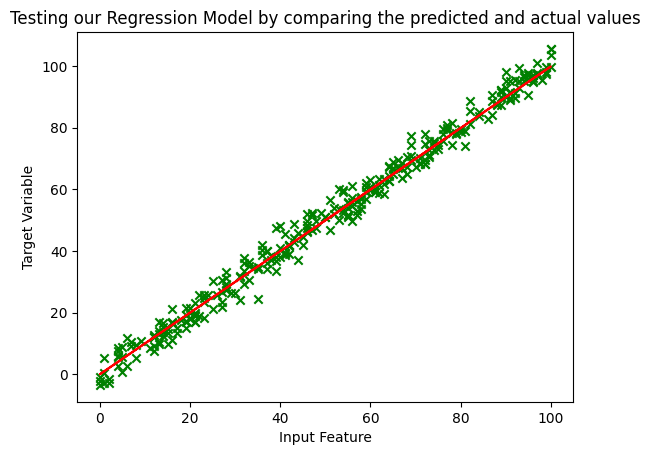

In [358]:
'''
In this code block, we compare the predicted values (predicted by our linear regression model) of the target variable with the actual values 
given a test data set x_test.
'''


weight, bias = UnivariateLinearRegressionModel(x_train, y_train)


plt.scatter(x_test, y_test, c='g', marker='x')
plt.plot(x_test, PredictOutput(x_test, weight, bias), c='r')
plt.title("Testing our Regression Model by comparing the predicted and actual values")
plt.xlabel("Input Feature")
plt.ylabel("Target Variable")
plt.show()